# 주제 : 서울특별시 공공건축물 발주현황 분석
- 데이터 출처 : 공공데이터 포털 (data.go.kr) 서울특별시 건설알림이
- 데이터 기간: 2020년~ 2024년 
- 데이터분석 : 자치구별 공사빈도 및 도급액총액을 중심으로 버블차트 확인

In [43]:
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np

In [7]:
# 파일 경로 설정
file_path = r"D:\work\서울시건설공사추진현황.xlsx"

# 엑셀 파일을 읽어서 DataFrame에 저장
work = pd.read_excel(file_path)

# 잘 불러와졌는지 확인 (앞부분 5행 출력)
print(work.head())

                               사업명  준공여부구분    준공여부  도급액(억원)      공사시작일  \
0               마곡동 1410 공공주택 건설공사       1  진행       153.03 2025-04-17   
1              2024년 1호선 궤도도상 개량공사       1  진행        49.26 2024-12-27   
2                  홍릉 R&D지원센터 전기공사       1  진행         7.22 2025-05-29   
3                4호선 전선로 개량공사(남태령)       0      준공    33.10 2024-05-03   
4  서초 성뒤마을 공공주택지구 석면 해체 및 지장물 철거공사       1  진행        32.77 2024-05-16   

       공사종료일  공사기간(일)  총 공사기간(월)  자치구코드  자치구명  
0 2027-02-26      680         22      4   강서구  
1 2026-03-01      429         14     16   성동구  
2 2027-03-15      655         21     11  동대문구  
3 2025-08-11      465         15     15   서초구  
4 2026-05-15      729         23     15   서초구  


자치구명
강남구      434
성동구      431
서대문구     267
강서구      263
송파구      262
중구       252
영등포구     249
마포구      245
노원구      240
서초구      239
성북구      233
양천구      215
동대문구     208
종로구      204
은평구      195
강동구      192
관악구      190
강북구      188
동작구      186
용산구      177
중랑구      170
도봉구      163
금천구      161
광진구      159
서울지역외    147
구로구      132
Name: count, dtype: int64


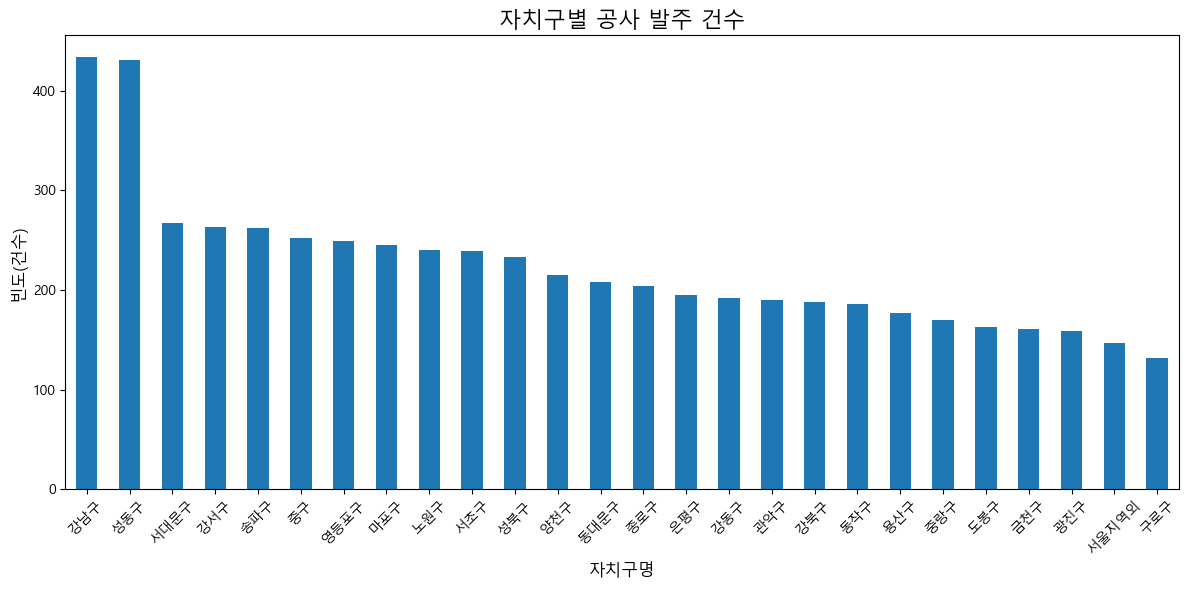

In [11]:
# 자치구명 열의 빈도 계산
freq = work['자치구명'].value_counts()

# 빈도 출력
print(freq)

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
freq.plot(kind='bar')

plt.title("자치구별 공사 발주 건수", fontsize=16)
plt.xlabel("자치구명", fontsize=12)
plt.ylabel("빈도(건수)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# 그래프의 한글 깨짐 처리
plt.rcParams["font.family"] = "Malgun Gothic"


In [12]:
# 자치구명별 도급액(억원) 총액 구하기
grouped = work.groupby("자치구명")["도급액(억원)"].sum().reset_index()

# 도급액 총액 기준 내림차순 정렬
grouped = grouped.sort_values(by="도급액(억원)", ascending=False)

# 결과 출력
print(grouped)

     자치구명   도급액(억원)
0     강남구  24927.26
1     강동구  14177.12
18    송파구  12057.62
8     노원구   8751.04
10   동대문구   8502.05
16    성동구   8347.32
3     강서구   7956.75
4     관악구   7435.91
14  서울지역외   7017.85
15    서초구   6945.04
23    종로구   6449.05
19    양천구   5575.18
5     광진구   5207.87
9     도봉구   4050.43
20   영등포구   2830.25
13   서대문구   2810.28
12    마포구   2768.51
17    성북구   2624.33
24     중구   1953.94
6     구로구   1868.85
25    중랑구   1842.73
21    용산구   1281.97
22    은평구   1239.04
11    동작구   1147.04
7     금천구   1097.06
2     강북구    848.73


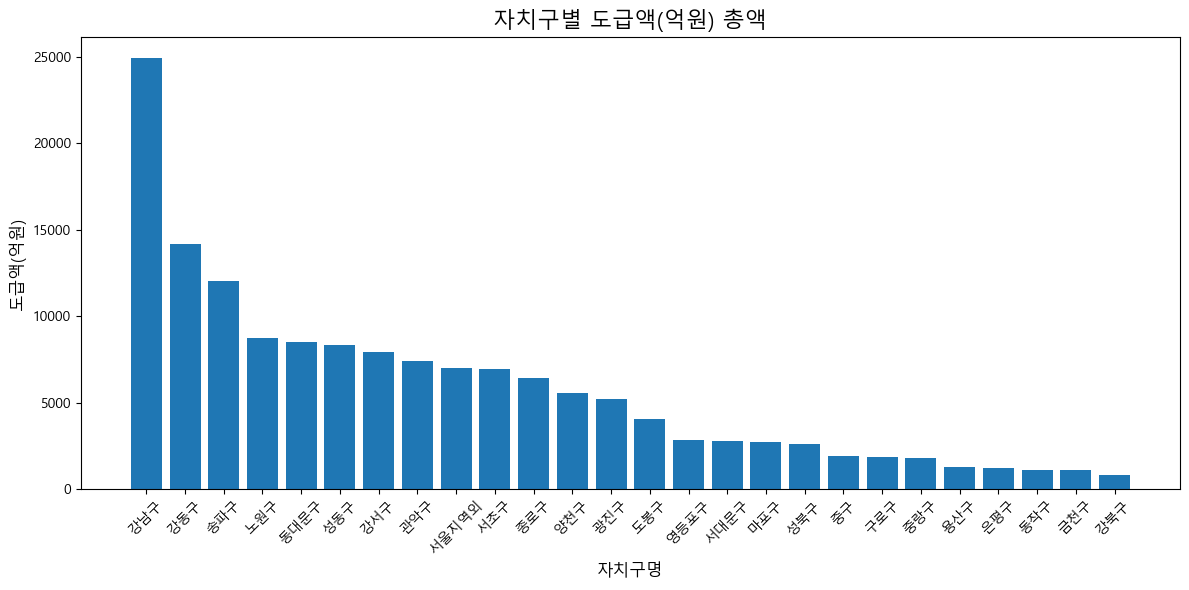

In [13]:
# 막대그래프 작성
plt.figure(figsize=(12, 6))
plt.bar(grouped["자치구명"], grouped["도급액(억원)"])

plt.title("자치구별 도급액(억원) 총액", fontsize=16)
plt.xlabel("자치구명", fontsize=12)
plt.ylabel("도급액(억원)", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
# 자치구명별 도급액(억원) 총액 계산
total_amount = work.groupby('자치구명')['도급액(억원)'].sum()plt.show()

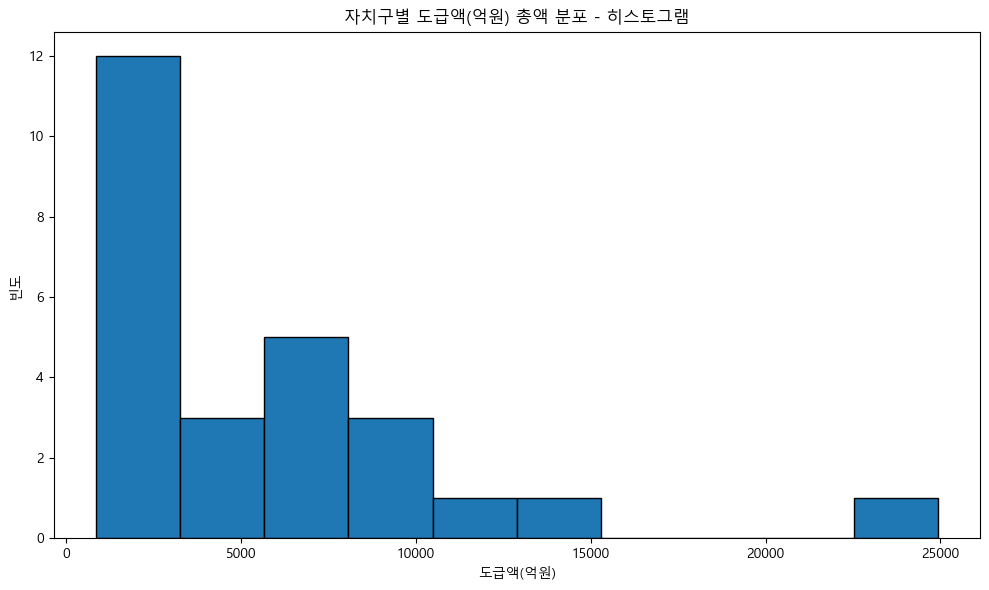

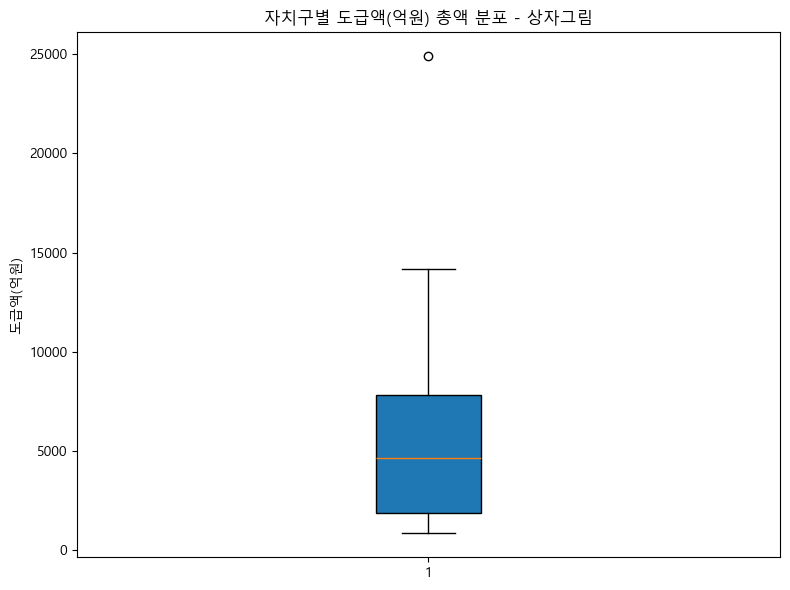

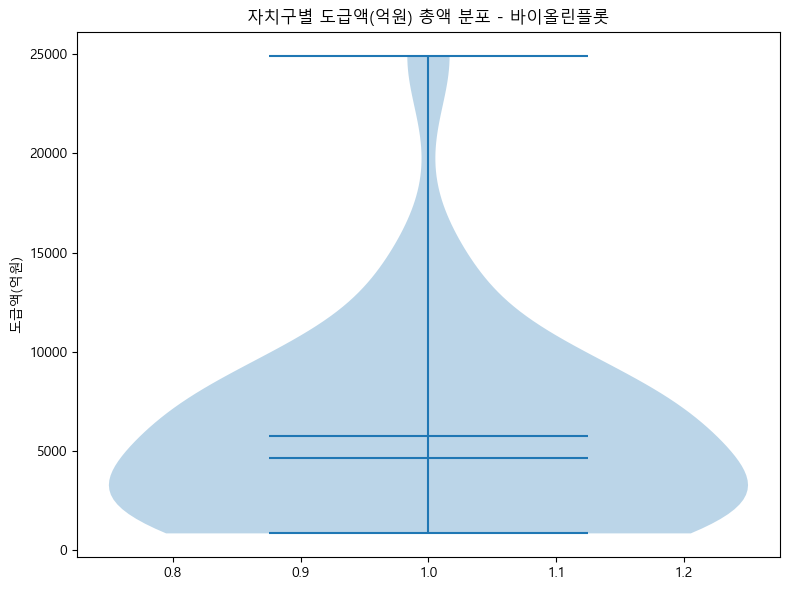

In [15]:
# 자치구명별 도급액(억원) 총액 계산
total_amount = work.groupby('자치구명')['도급액(억원)'].sum()

# -------- 히스토그램 --------
plt.figure(figsize=(10,6))
plt.hist(total_amount, bins=10, edgecolor='black')
plt.title("자치구별 도급액(억원) 총액 분포 - 히스토그램")
plt.xlabel("도급액(억원)")
plt.ylabel("빈도")
plt.tight_layout()
plt.show()

# -------- 상자그림 (Boxplot) --------
plt.figure(figsize=(8,6))
plt.boxplot(total_amount, vert=True, patch_artist=True)
plt.title("자치구별 도급액(억원) 총액 분포 - 상자그림")
plt.ylabel("도급액(억원)")
plt.tight_layout()
plt.show()

# -------- 바이올린플롯 (Violin plot) --------
plt.figure(figsize=(8,6))
plt.violinplot(total_amount, showmeans=True, showmedians=True)
plt.title("자치구별 도급액(억원) 총액 분포 - 바이올린플롯")
plt.ylabel("도급액(억원)")
plt.tight_layout()
plt.show()

  자치구명  공사빈도  도급액총액(억원)
0  강남구   434   24927.26
1  강동구   192   14177.12
2  강북구   188     848.73
3  강서구   263    7956.75
4  관악구   190    7435.91


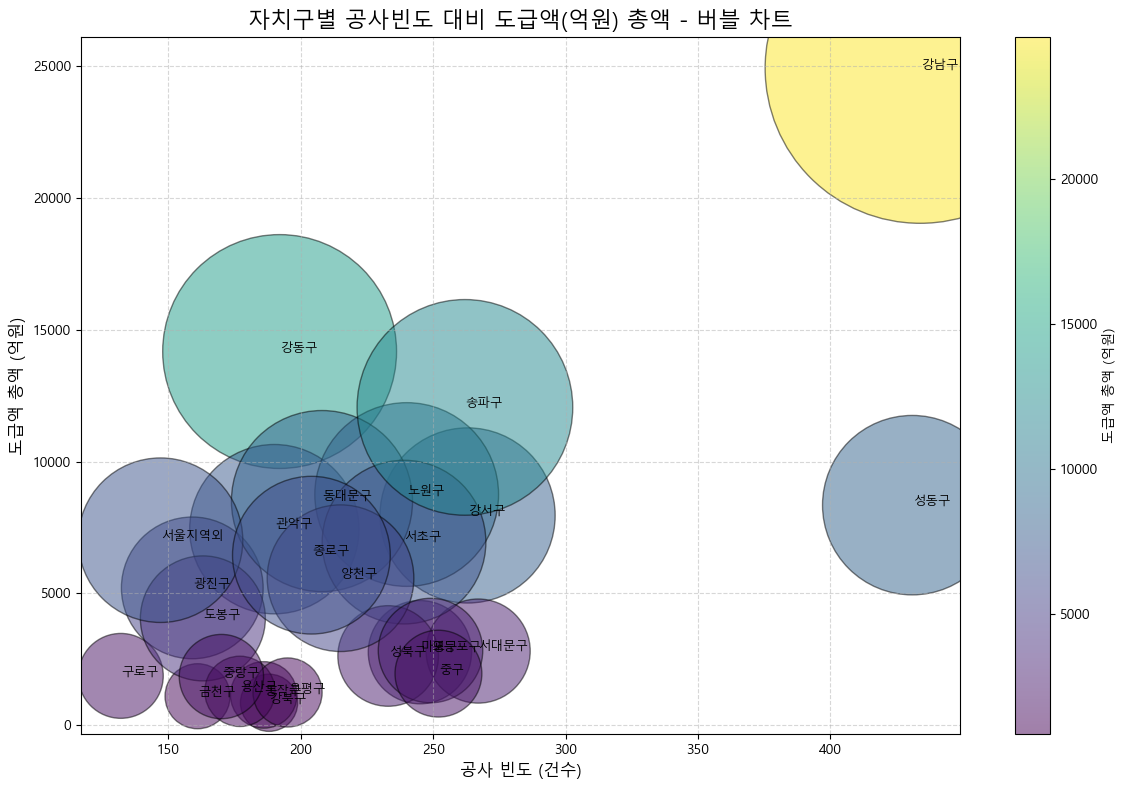

In [16]:

# 자치구별 공사 빈도 (건수)
freq = work['자치구명'].value_counts()

# 자치구별 도급액 총액
amount = work.groupby('자치구명')['도급액(억원)'].sum()

# 두 데이터 합치기
summary = pd.DataFrame({
    '공사빈도': freq,
    '도급액총액(억원)': amount
}).reset_index().rename(columns={'index': '자치구명'})

print(summary.head())

# -------- 버블 차트 --------
plt.figure(figsize=(12, 8))

# 버블 크기 = 도급액 총액에 비례 (스케일 조정)
plt.scatter(
    summary['공사빈도'],
    summary['도급액총액(억원)'],
    s=summary['도급액총액(억원)']*2,  # 크기 조정 (필요시 곱하기 값 변경)
    alpha=0.5,
    c=summary['도급액총액(억원)'],  # 색상도 금액에 따라
    cmap='viridis',
    edgecolors='black'
)

# 각 버블에 자치구명 라벨 표시
for i, row in summary.iterrows():
    plt.text(row['공사빈도']+0.2, row['도급액총액(억원)'], row['자치구명'], fontsize=9)

plt.title("자치구별 공사빈도 대비 도급액(억원) 총액 - 버블 차트", fontsize=16)
plt.xlabel("공사 빈도 (건수)", fontsize=12)
plt.ylabel("도급액 총액 (억원)", fontsize=12)
plt.colorbar(label="도급액 총액 (억원)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

  자치구명  공사빈도  도급액총액(억원)
2  강북구   188     848.73
3  강서구   263    7956.75
4  관악구   190    7435.91
5  광진구   159    5207.87
6  구로구   132    1868.85


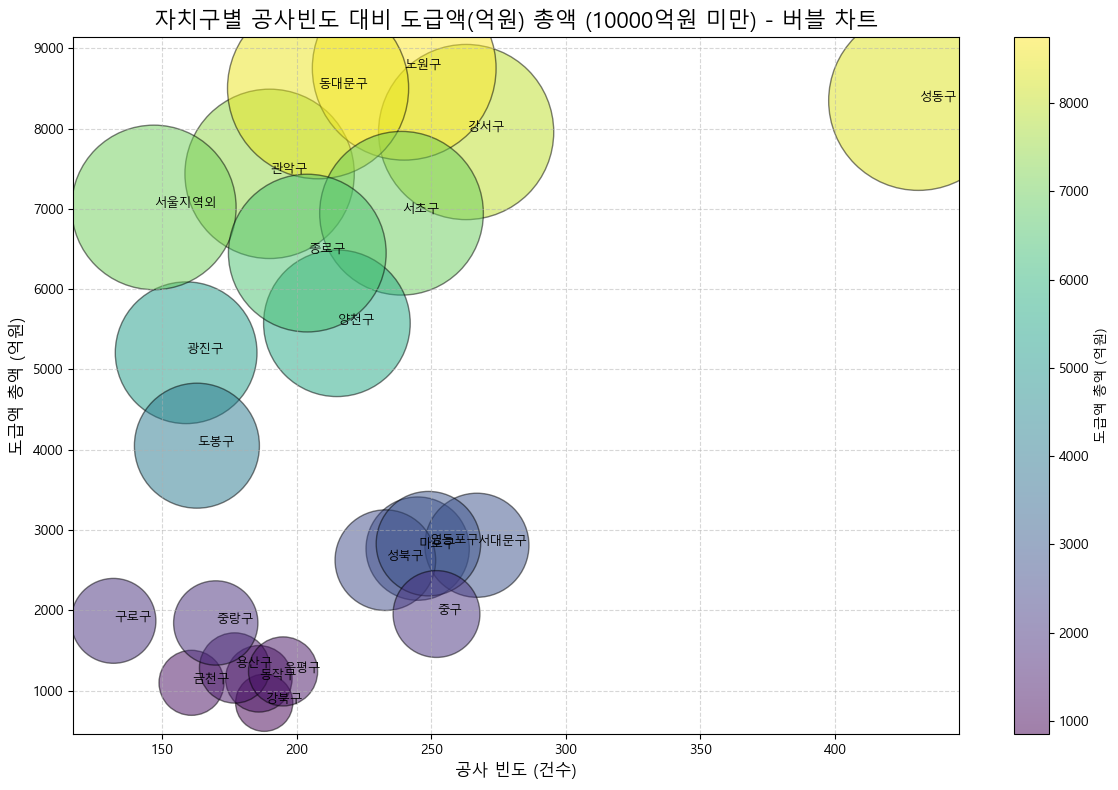

In [17]:
# 자치구별 공사 빈도 (건수)
freq = work['자치구명'].value_counts()

# 자치구별 도급액 총액
amount = work.groupby('자치구명')['도급액(억원)'].sum()

# 두 데이터 합치기
summary = pd.DataFrame({
    '공사빈도': freq,
    '도급액총액(억원)': amount
}).reset_index().rename(columns={'index': '자치구명'})

# 10000억원 미만만 필터링
summary_filtered = summary[summary['도급액총액(억원)'] < 10000]

print(summary_filtered.head())

# -------- 버블 차트 --------
plt.figure(figsize=(12, 8))

plt.scatter(
    summary_filtered['공사빈도'],
    summary_filtered['도급액총액(억원)'],
    s=summary_filtered['도급액총액(억원)']*2,   # 버블 크기 (필요시 스케일 조정)
    alpha=0.5,
    c=summary_filtered['도급액총액(억원)'],     # 색상도 도급액 반영
    cmap='viridis',
    edgecolors='black'
)

# 각 버블에 자치구명 표시
for i, row in summary_filtered.iterrows():
    plt.text(row['공사빈도']+0.2, row['도급액총액(억원)'], row['자치구명'], fontsize=9)

plt.title("자치구별 공사빈도 대비 도급액(억원) 총액 (10000억원 미만) - 버블 차트", fontsize=16)
plt.xlabel("공사 빈도 (건수)", fontsize=12)
plt.ylabel("도급액 총액 (억원)", fontsize=12)
plt.colorbar(label="도급액 총액 (억원)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

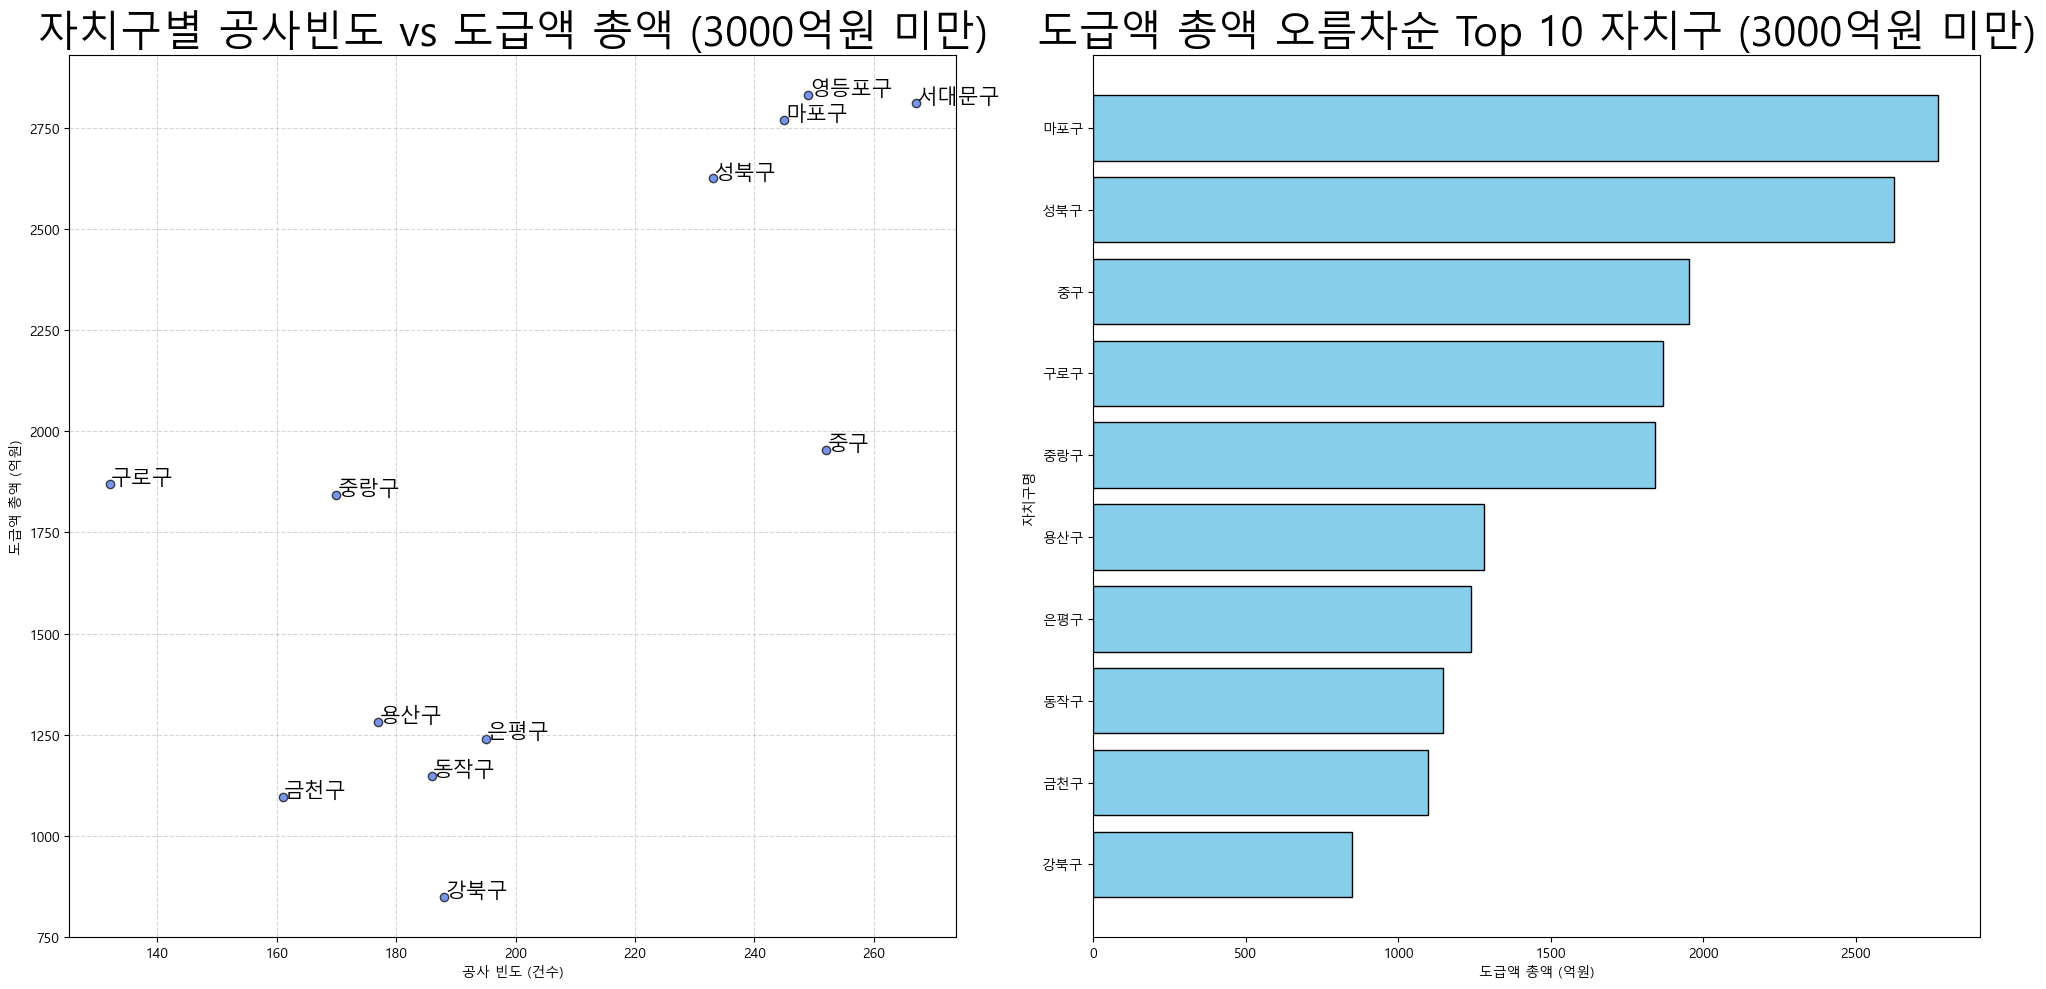

In [42]:
# 자치구별 공사 빈도 (건수)
freq = work['자치구명'].value_counts()

# 자치구별 도급액 총액
amount = work.groupby('자치구명')['도급액(억원)'].sum()

# 데이터 합치기
summary = pd.DataFrame({
    '공사빈도': freq,
    '도급액총액(억원)': amount
}).reset_index().rename(columns={'index': '자치구명'})

# 3000억원 미만만 필터링
summary_filtered = summary[summary['도급액총액(억원)'] < 3000]

# 오름차순 정렬 후 Top N 선택 (예: Top 10)
N = 10
summary_sorted = summary_filtered.sort_values(by='도급액총액(억원)', ascending=True).head(N)

# -------- 시각화 --------
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# (1) 산점도
axes[0].scatter(
    summary_filtered['공사빈도'],
    summary_filtered['도급액총액(억원)'],
    color='royalblue',
    alpha=0.7,
    edgecolors='black'
)
for i, row in summary_filtered.iterrows():
    axes[0].text(row['공사빈도']+0.2, row['도급액총액(억원)'], row['자치구명'], fontsize=15)

axes[0].set_title("자치구별 공사빈도 vs 도급액 총액 (3000억원 미만)", fontsize=30)
axes[0].set_xlabel("공사 빈도 (건수)")
axes[0].set_ylabel("도급액 총액 (억원)")
axes[0].grid(True, linestyle="--", alpha=0.5)

# (2) 막대그래프
axes[1].barh(summary_sorted['자치구명'], summary_sorted['도급액총액(억원)'], color='skyblue', edgecolor='black')
axes[1].set_title(f"도급액 총액 오름차순 Top {N} 자치구 (3000억원 미만)", fontsize=30)
axes[1].set_xlabel("도급액 총액 (억원)")
axes[1].set_ylabel("자치구명")



plt.tight_layout()
plt.show()

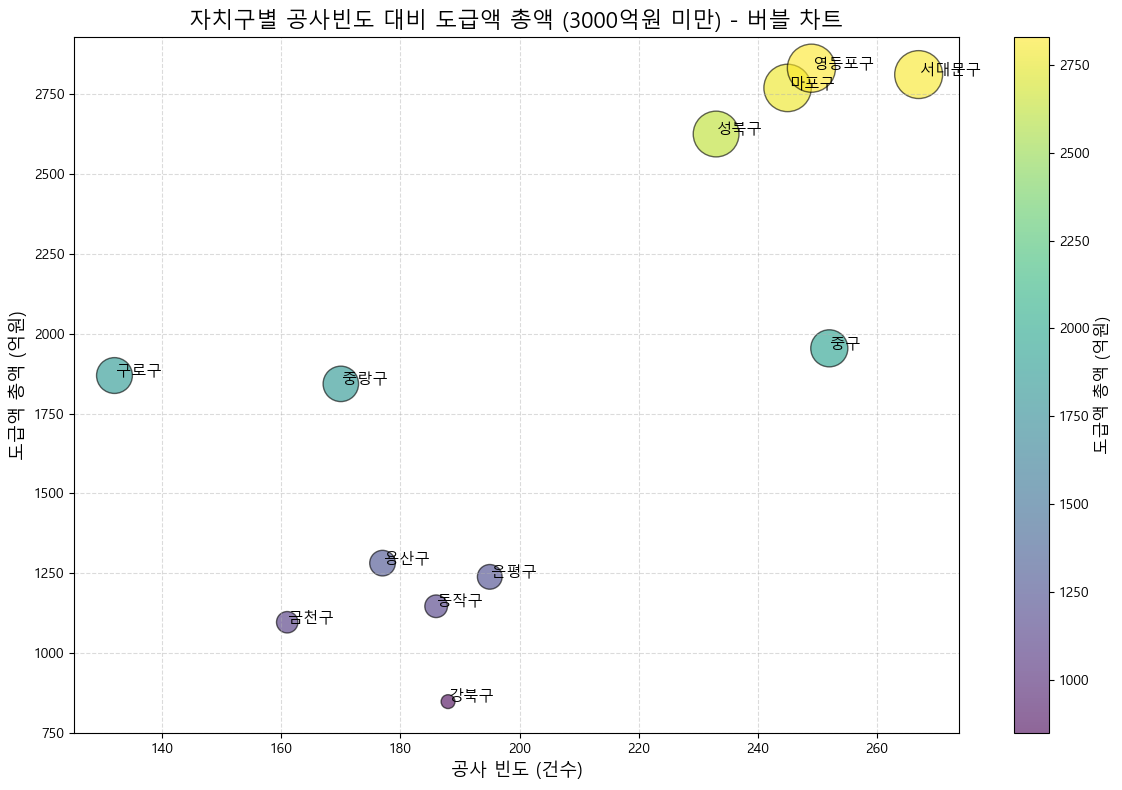

In [46]:
# 0) '도급액(억원)'이 문자열이면 숫자로 변환
amount_col = '도급액(억원)'
if work[amount_col].dtype == 'object':
    work[amount_col] = (
        work[amount_col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace({'': np.nan})
        .astype(float)
    )

# 1) 자치구별 공사 빈도와 도급액 총액
freq = work['자치구명'].value_counts()
amount = work.groupby('자치구명')[amount_col].sum(min_count=1)

# 2) 합치기
summary = (
    pd.DataFrame({'공사빈도': freq, '도급액총액(억원)': amount})
    .reset_index()
    .rename(columns={'index': '자치구명'})
    .dropna(subset=['도급액총액(억원)'])
)

# 3) 3000억원 미만 필터링
summary_filtered = summary[summary['도급액총액(억원)'] < 3000].copy()

# 4) 버블 크기 스케일링
min_size, max_size = 100, 1200
v = summary_filtered['도급액총액(억원)'].to_numpy()
if len(v) == 0:
    print("조건(3000억원 미만)을 만족하는 자치구가 없습니다.")
else:
    v_min, v_max = np.nanmin(v), np.nanmax(v)
    if v_max == v_min:
        sizes = np.full_like(v, (min_size + max_size) / 2, dtype=float)
    else:
        sizes = (v - v_min) / (v_max - v_min)
        sizes = sizes * (max_size - min_size) + min_size

    # 5) 버블 차트 (색상도 도급액 총액에 비례)
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        summary_filtered['공사빈도'],
        summary_filtered['도급액총액(억원)'],
        s=sizes,
        alpha=0.6,
        c=summary_filtered['도급액총액(억원)'],  # 색상 값 = 도급액
        cmap='viridis',
        edgecolors='black'
    )

    # 라벨(자치구명)
    for _, row in summary_filtered.iterrows():
        plt.text(
            row['공사빈도'] + 0.2,
            row['도급액총액(억원)'],
            row['자치구명'],
            fontsize=11
        )

    plt.title("자치구별 공사빈도 대비 도급액 총액 (3000억원 미만) - 버블 차트", fontsize=16)
    plt.xlabel("공사 빈도 (건수)", fontsize=13)
    plt.ylabel("도급액 총액 (억원)", fontsize=13)

    # 색상 바(Colorbar) 추가
    cbar = plt.colorbar(scatter)
    cbar.set_label("도급액 총액 (억원)", fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.45)
    plt.tight_layout()
    plt.show()

# 분석 결론 
- 서울시 공공건축물 발주현황을 분석결과 금천,강북, 동작, 용산, 은평구가 발주금액이 적음
- 향후 발주공사 선정시 소외된 지역부터 먼저 살펴보는것이 좋을것으로 사료됨. 